import libraries

In [ ]:
import pandas as pd
import os

# Check current working directory
print(os.getcwd())

# List files in the folder
print(os.listdir())

# Load the NEW dataset (Excel file)
df = pd.read_csv("Zomato_cleaned_data.csv")

# Verify data
df.head()

c:\Users\sirag\OneDrive\Desktop\Restaurant_Revenue_Project
['powerBI_dashboard2.pbix', 'Restaurant_Revenue_Prediction_EDA.ipynb', 'zomato_cleaned_data.csv']


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


Data Understanding

In [ ]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9552 non-null   object 
 1   Restaurant Name       9552 non-null   object 
 2   Country Code          9552 non-null   object 
 3   City                  9552 non-null   object 
 4   Address               9552 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   object 
 8   Latitude              9551 non-null   object 
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   object 
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                1
Locality Verbose        1
Longitude               1
Latitude                1
Cuisines                1
Average Cost for two    1
Currency                1
Has Table booking       1
Has Online delivery     1
Is delivering now       1
Switch to order menu    1
Price range             1
Aggregate rating        2
Rating color            2
Rating text             2
Votes                   2
dtype: int64

Data cleaning

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Ensure numeric types (already mostly correct, but safe)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')

# Drop rows with missing important values
df.dropna(
    subset=['Aggregate rating', 'Votes', 'Average Cost for two'],
    inplace=True
)

EDA

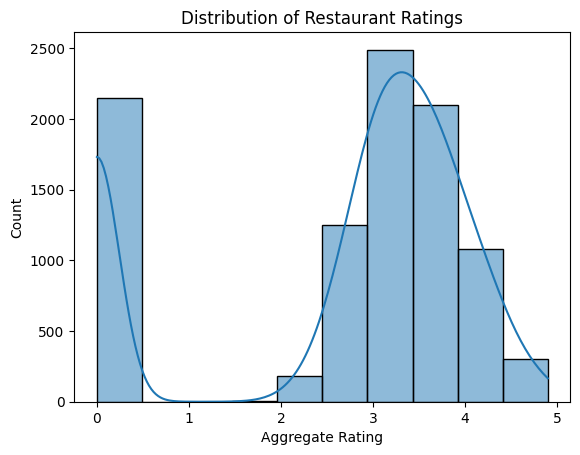

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of restaurant ratings
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

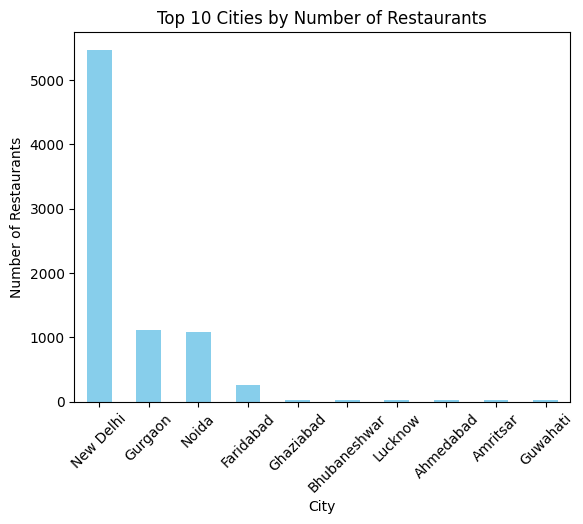

In [ ]:
# Bar chart of top 10 cities
df['City'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Ensure numeric columns
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Calculate Revenue
df['Revenue'] = df['Average Cost for two'] * df['Votes']

# Check first 5 rows
df[['Restaurant Name', 'Average Cost for two', 'Votes', 'Revenue']].head()

,Restaurant Name,Average Cost for two,Votes,Revenue
0,Le Petit Souffle,1100.0,314.0,345400.0
1,Izakaya Kikufuji,1200.0,591.0,709200.0
2,Heat - Edsa Shangri-La,4000.0,270.0,1080000.0
3,Ooma,1500.0,365.0,547500.0
4,Sambo Kojin,1500.0,229.0,343500.0


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Revenue'],
      dtype='object')

In [ ]:
# -----------------------------
# Step 1: Import required libraries
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# -----------------------------
# Step 2: Prepare the data
# -----------------------------
# Recalculate Revenue just to be safe
df['Revenue'] = df['Average Cost for two'] * df['Votes']

# Drop any rows with missing values in key columns
df.dropna(subset=['Votes', 'Aggregate rating', 'Average Cost for two'], inplace=True)

# Select features (X) and target (y)
X = df[['Votes', 'Aggregate rating']]
y = df['Revenue']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 3: Train the Linear Regression model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Make predictions and evaluate
# -----------------------------
y_pred = model.predict(X_test)

# Print R² score
print("R² score:", r2_score(y_test, y_pred))

# -----------------------------
# Step 5: Show first 5 predictions vs actual Revenue
# -----------------------------
pred_vs_actual = pd.DataFrame({
    'Predicted Revenue': y_pred,
    'Actual Revenue': y_test
}).head()

print(pred_vs_actual)

R² score: 0.0067323132102955485
      Predicted Revenue  Actual Revenue
4733      130005.344570         31200.0
1470      547671.388750         66000.0
9038      209667.359467         19800.0
7867      662594.858959         32600.0
5572     -230690.623337             0.0
